In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit 

#Generates Number of Stars in each Frame [p(D)], of which there are len(D)
def Pixels(D, p_0):
    p=[None]*len(D)
    i=0
    while i< len(D):
        p[i] = p_0*(D[i]/D[0])**2
        i += 1
    return p

#Generates a D length array, where each entry has p random coordinates corresponding to the location of stars
#of a given frame of distance D
def Distribution(D, p, slength):
    output = [None]*len(D)
    i = 0
    while i < len(D):
        parent = [None]*2
        x = np.random.uniform(0, slength, int(p[i]))
        y = np.random.uniform(0, slength, int(p[i]))
        parent[0] = x
        parent[1] = y
        output[i] = parent
        i += 1
    return output

initp_0 = 2
Distance = np.arange(2, 100, 2)
pin = Pixels(Distance, initp_0)   
test = Distribution(Distance, pin, 2)

In [1]:
def nstars(lst_all, slength):
    n_pixel = slength**2 * 2 
    output = []
    i = 0
    while i < len(lst_all):
        output.append(len(lst_all[i])/n_pixel)
        i += 1
    return output

def fluxStdv(lst_all, slength, D):
    variance = nstars(lst_all, slength)
    flux = []
    i = 0
    while i < len(D):
        flux.append(1/(D[i]/D[0])**2)
        i += 1
    return flux*np.sqrt(variance)

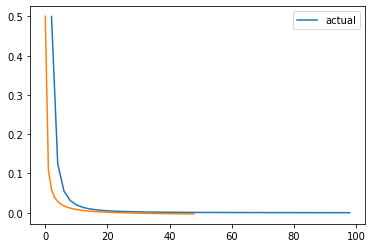

In [7]:
plt.plot(Distance, fluxStdv(test, 2, Distance), label = "actual")
plt.legend()

def func(x, a, b, c):
    return a/(x-b) + c


popt, pcov = curve_fit(func, Distance, fluxStdv(test, 2, Distance))
plt.plot(func(Distance, popt[0], popt[1], popt[2]))